In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('digits.csv')


In [3]:
a=df[200:201]
b=df[201:202]
newdf = df[0:200]

In [4]:
labels = newdf['label']
pixels = newdf.iloc[:, 1:]

In [5]:
pixels = newdf.iloc[:, 1:]

def change_value_to_binary(element):
    if element > 128:
        return 1
    else:
        return 0

binarydf = pixels.map(change_value_to_binary)

In [6]:
sample = binarydf.sample(1)
sample_np = sample.to_numpy()
sample_np =sample_np.reshape((28,28))

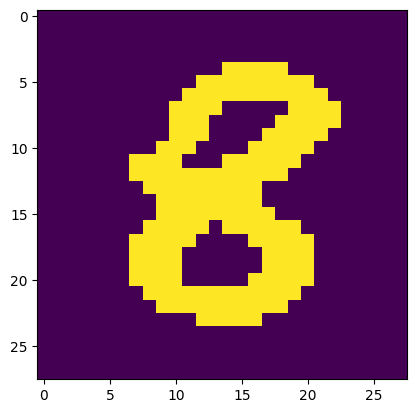

In [7]:
from matplotlib.pyplot import imshow

imshow(sample_np)

In [8]:
beta_sample=pixels.iloc[8:9,0:404]
beta_sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


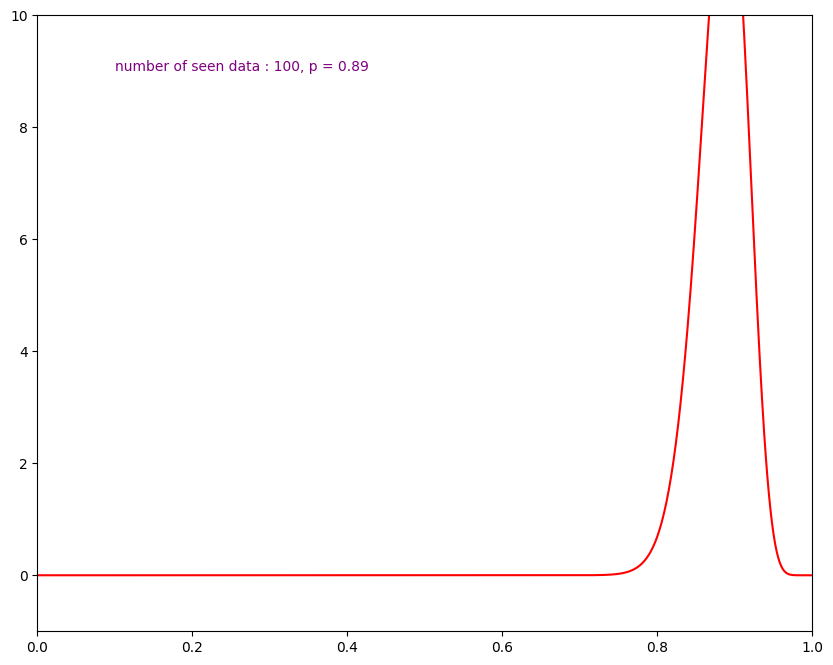

<Figure size 1000x800 with 0 Axes>

In [9]:
## you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)

    
    pnyfy = []
    for i in range(len(p)):
        y = p[i]
        if n:
            pny = y
        else:
            pny = 1-y
        pnyfy.append(pny * fy[i])

    pnyfy = np.array(pnyfy)
    integral = 0
    for i in range(len(p)):
        integral += (1/t) * pnyfy[i]

    post = pnyfy / integral
    return post


plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)